## ReAct Agent

### Now Lets Start with ReAct Agent

**React agents and function calling agents are two distinct approaches to leveraging Large Language Models (LLMs) for automating tasks. Both methods aim to integrate LLMs with external tools and systems, but they differ in their underlying logic and implementation.**

### React Agent

A React agent combines reasoning and action in a continuous loop. The LLM “thinks” about the problem, decides the steps to be taken, allows the agent to take action based on its reasoning, and then observes the result to refine its understanding. This approach relies on “ReACT prompting,” which involves crafting prompts that guide the LLM to alternate between reasoning and action steps.

**Key features of React agents:**
1.Reasoning and action loop: The agent continuously reasons about the task, decides on actions, and observes the outcomes to refine its understanding.

2.ReACT prompting: The agent uses specific prompting techniques to guide the LLM’s reasoning and action steps.

3.Agent types: React agents are tailored for specific tasks and utilize CoT (Conversational Task) and ReACT prompting.

4.Strengths: Suitable for tasks requiring multi-step reasoning, complex planning, and understanding of context.

5.Limitations: Can be computationally expensive due to the reasoning steps involved and requires more effort to define prompts and actions.

### Function Calling Agent

**A function calling agent**, introduced by OpenAI, allows LLMs to understand a pre-defined format of a function (JSON structure) as part of a user prompt and intelligently choose to output a JSON object containing arguments to call a function (tool in an agent). This approach relies on pre-defined functions and their parameters.

Key features of function calling agents:
1.Pre-defined functions: The agent uses pre-defined functions with well-defined parameters and outputs.

2.JSON-based input: The agent receives JSON objects containing function names and arguments.

3.Agent simplicity: Function calling agents are generally easier to implement, relying on pre-defined functions and parameters.

4.Strengths: Excels at integrating LLMs with external systems and performing specific tasks through well-defined functions.

5.Limitations: Less suitable for open-ended tasks where actions are not pre-defined. Comparison

https://medium.com/@terrycho/how-langchain-agent-works-internally-trace-by-using-langsmith-df23766e7fb4

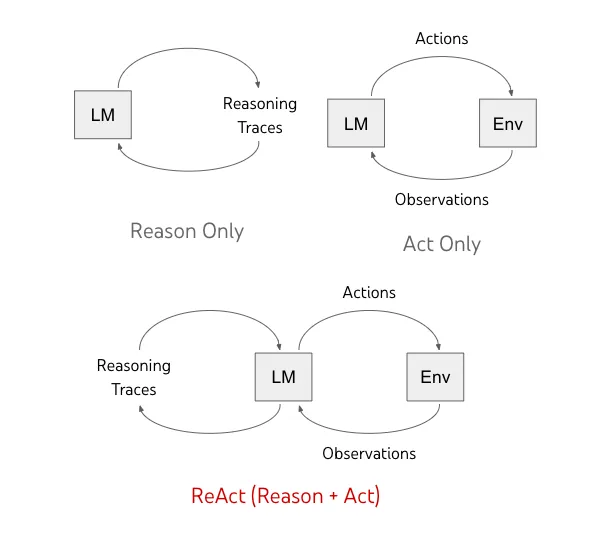

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [12]:
GOOGLE_API_KEY=os.getenv("GOOGLE_API_KEY")
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")
LANGCHAIN_API_KEY=os.getenv("LANGCHAIN_API_KEY")
LANGCHAIN_PROJECT=os.getenv("LANGCHAIN_PROJECT")
SERPER_API_KEY=os.getenv("SERPER_API_KEY")

os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY
os.environ["TAVILY_API_KEY"] = TAVILY_API_KEY
os.environ["SERPER_API_KEY"]=SERPER_API_KEY
os.environ["LANGCHAIN_API_KEY"] = LANGCHAIN_API_KEY
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_PROJECT"]=LANGCHAIN_PROJECT

In [33]:
## Loading the model and Embeddings

from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings

embeddings= GoogleGenerativeAIEmbeddings(model='models/embedding-001')

llm= ChatGoogleGenerativeAI(model='gemini-1.0-pro')

In [14]:
from langchain.utilities import GoogleSerperAPIWrapper
from langchain.agents import initialize_agent, Tool
from langchain.agents import AgentType
from langchain_core.prompts import PromptTemplate
from langchain.agents import AgentExecutor, create_react_agent

In [20]:
# google_search = GoogleSerperAPIWrapper()

# tools = [
#     Tool(
#         name="Google Search Answer",
#         func=google_search.run,
#         description="useful for when you need to ask with Google search",
#         verbose=True
#     )]

from langchain.tools.tavily_search import TavilySearchResults

search= TavilySearchResults()

tools= [search]

In [21]:
template = '''Answer the following questions as best you can. You have access to the following tools:
{tools}
Use the following format:
Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question
Begin!
Question: {input}
Thought:{agent_scratchpad}'''

prompt = PromptTemplate.from_template(template)

In [22]:
search_agent = create_react_agent(llm, tools, prompt)
agent_executor = AgentExecutor(
    agent=search_agent,
    tools=tools,
    verbose=True,
    return_intermediate_steps=True,
)

In [26]:
response = agent_executor.invoke({"input": "Where is the hometown of the 2007 T20 World cup winner captain?"})
print(response)



> Entering new AgentExecutor chain...
Thought: I need to find out who the captain of the 2007 T20 World Cup winning team was, and then I can search for their hometown. 
Action: tavily_search_results_json
Action Input: 2007 T20 World Cup winning captain [{'url': 'https://www.espncricinfo.com/series/icc-world-twenty20-2007-08-286109/india-vs-pakistan-final-287879/full-scorecard', 'content': 'Live Cricket Scoreboard: Get India vs Pakistan Final, cricket scorecard, ICC World Twenty20 2007/08 dated September 24, 2007. Matches (7) ... Pakistan win the 2007 T20 World Cup.'}, {'url': 'https://www.sportskeeda.com/cricket/t20-world-cup-winning-captains-list', 'content': "2021. Jos Buttler. 1. England. 2022. Daren Sammy is the only captain to have won multiple ICC T20 World Cup trophies. India's MS Dhoni (2007), England's Paul Collingwood (2010), Sri Lanka's"}, {'url': 'https://timesofindia.indiatimes.com/sports/cricket/icc-mens-t20-world-cup/icc-t20-world-cup-winners-list-with-captains/article

### ReAct agent with custom tool (very good use case)

In [34]:
from langchain.agents import tool
 
# Custom tool for the Agent 
@tool
def get_employee_id(name):
  """
  To get employee id, it takes employee name as arguments
  name(str): Name of the employee
  """
  fake_employees = {
    "Alice": "E001",
    "Bob": "E002",
    "Charlie": "E003",
    "Diana": "E004",
    "Evan": "E005",
    "Fiona": "E006",
    "George": "E007",
    "Hannah": "E008",
    "Ian": "E009",
    "Jasmine": "E010"}
  
  return fake_employees.get(name,"Employee not found")

# Custom tool for the Agent 
@tool
def get_employee_salary(employee_id):
  """
  To get the salary of an employee, it takes employee_id as input and return salary
  """
  employee_salaries = {
    "E001": 56000,
    "E002": 47000,
    "E003": 52000,
    "E004": 61000,
    "E005": 45000,
    "E006": 58000,
    "E007": 49000,
    "E008": 53000,
    "E009": 50000,
    "E010": 55000
    }
  return employee_salaries.get(employee_id,"Employee not found")


In [35]:
from langchain import hub

# Saved React Prompt in langchain hub, we could manually type the prompt as well.
prompt = hub.pull("hwchase17/react")
print(prompt.template)

Answer the following questions as best you can. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:{agent_scratchpad}


In [36]:
tools = [get_employee_salary, get_employee_id]

agent = create_react_agent(llm, tools, prompt)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

agent_executor.invoke({"input":"What is the Salary of Evan?"})



> Entering new AgentExecutor chain...
Action: get_employee_id
Action Input: EvanE005Action: get_employee_salary
Action Input: E00545000Final Answer: 45000

> Finished chain.


{'input': 'What is the Salary of Evan?', 'output': '45000'}

In [37]:
agent_executor.invoke({"input":"What is the Salary of Manirathinam?"})



> Entering new AgentExecutor chain...
I need to first get the employee id of Manirathinam and then using that employee id, I can find out the salary
Action: get_employee_id
Action Input: ManirathinamEmployee not foundFinal Answer: None

> Finished chain.


{'input': 'What is the Salary of Manirathinam?', 'output': 'None'}